<h1 align="center">Classification of Arrhythmia</h1>

### Unzip the the downloaded zipped file and scrape with .data file

In [126]:
!unzip /content/arrhythmia.zip

Archive:  /content/arrhythmia.zip
replace arrhythmia.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 


* Analyzed a dataset comprising 452 instances across 16 classes, with 245 cases representing individuals without arrhythmias ("normal").


* Explored 12 distinct arrhythmia types, emphasizing the significance of "coronary artery disease" and "Rjgbt bundle branch block."
* Leveraged a dataset encompassing 279 features, including patient age, sex, weight, height, and other relevant information.


* Our goal is to predict if a person is suffering from arrhythmia or not, and if **yes**, classify it in to one of 12 available groups.

### Importing Essential Libraries

In [233]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns

import matplotlib.pyplot as plt
#to avoid writing plot.show
%matplotlib inline
from sklearn.impute import SimpleImputer

### Data Reading

In [234]:
df=pd.read_csv("/content/arrhythmia.data",header=None)

In [235]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


**Basic Description of dataframe**

In [236]:
#Dimension of dataset.

df.shape

(452, 280)

In [237]:
#descriptive statistics of dataframe.

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# 1. Data preprocessing

### Handling Missing Values

<br>
When we went through the dataset we observed that out of 279 attributes, 5 Attributes have missing value in the form
of '?'. Our approach is

- first replacing '?' with numpy.NAN.
- Imputing the mean using Simple Imputer.

**Checking for null values in dataset**

In [238]:
#Counting total Number of null values

pd.isnull(df).sum().sum()

0

In [239]:
#Replacing ? with np.nan value-

df = df.replace('?', np.NaN)

In [240]:
#final counting total number of null values in dataset

nv=pd.isnull(df).sum().sum()
nv

408

**Visualizing  the distribution of our missing data:**

Text(0, 0.5, 'Total number of null value in each column')

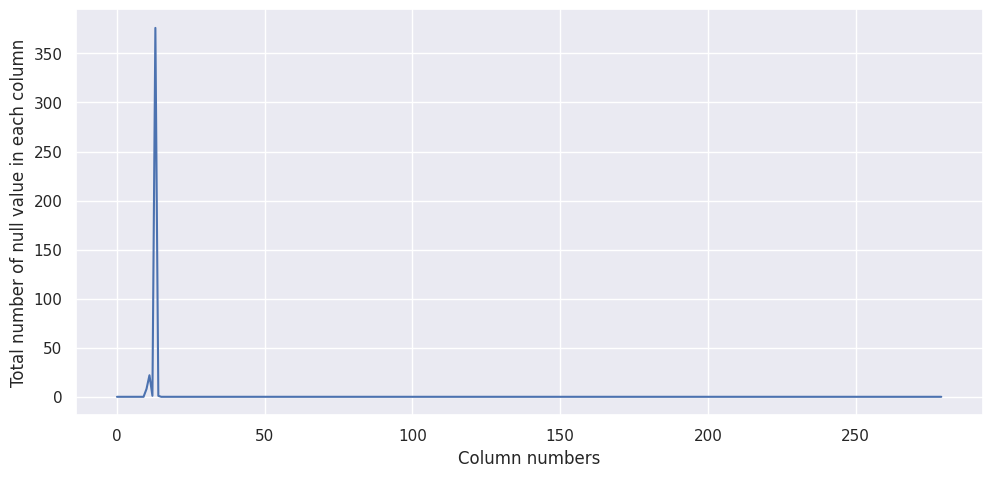

In [241]:
pd.isnull(df).sum().plot()
plt.xlabel('Column numbers')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

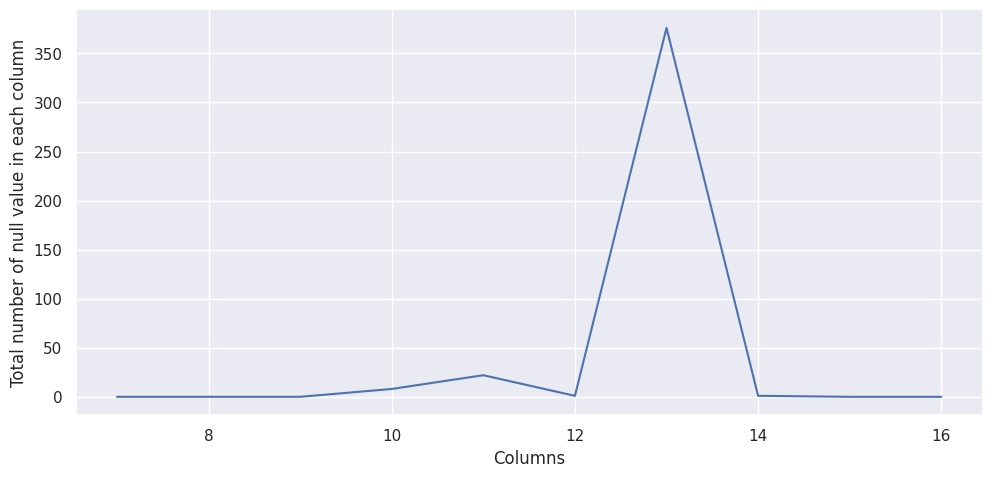

In [242]:
#Zooming in

pd.isnull(df).sum()[7:17].plot(kind="line")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Column 13 contains more than 350 missing values out of total 452 instances. so we will drop column 13. other attributes have comparatively less null values. So instead of droping, we will replace the null value of other attributes with their mean values.

In [243]:
#Dropping the column 13

df.drop(columns = 13, inplace=True)

**Using the mean strategy for imputation**

In [244]:
# make copy to avoid changing original data (when Imputing)

new_df = df.copy()

In [245]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [246]:
# Imputation
# my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [247]:
# imputed dataframe

new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [248]:
# DataSet with Zero null Values.

pd.isnull(new_df).sum().sum()

0

**Generating final dataset**

In [249]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom",
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [250]:
#Adding Column names to dataset

new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head(5)

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


As our dataframe is completely cleaned and preprocessed. we will remove the target attribute and store our final dataframe.

In [251]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [252]:
final_df.shape

(452, 278)

# 2. Exploratory Data Analysis (EDA)

Analyzing data sets to summarize their main characteristics.

Making List of all the type of Arrythmia corresponsing to their class label

In [253]:
#List with class names

class_names = ["Normal",
               "Ischemic changes (CAD)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

### Analyzing the dataset and check how many examples we have for each class:
we need to sort our dataset with respect to class attributes to count the number of instances available for each class

In [254]:
t=new_df.sort_values(by=["class"])

In [255]:
# Counting the number of instances for each class

la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

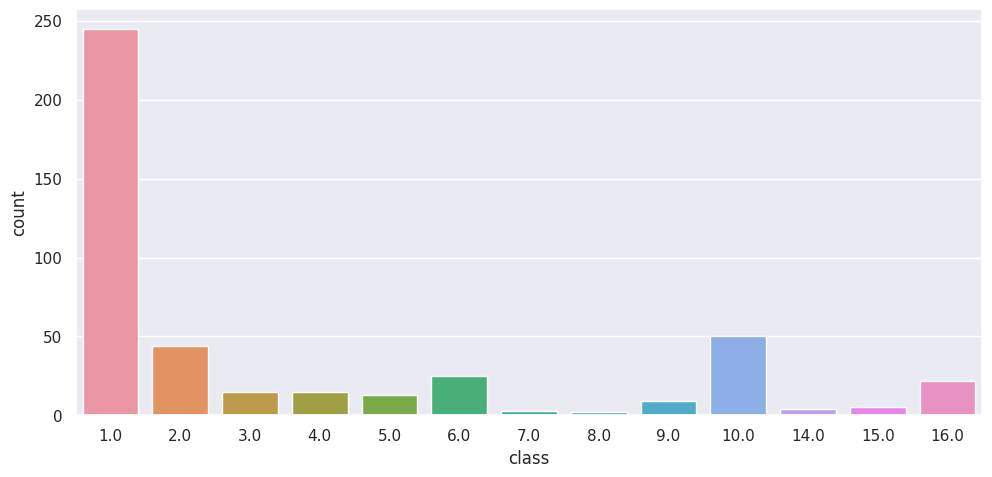

In [256]:
sns.countplot(x ='class',data =new_df)
plt.show()

Lets Count the total number of instances we have for each class.

In [257]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)


[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


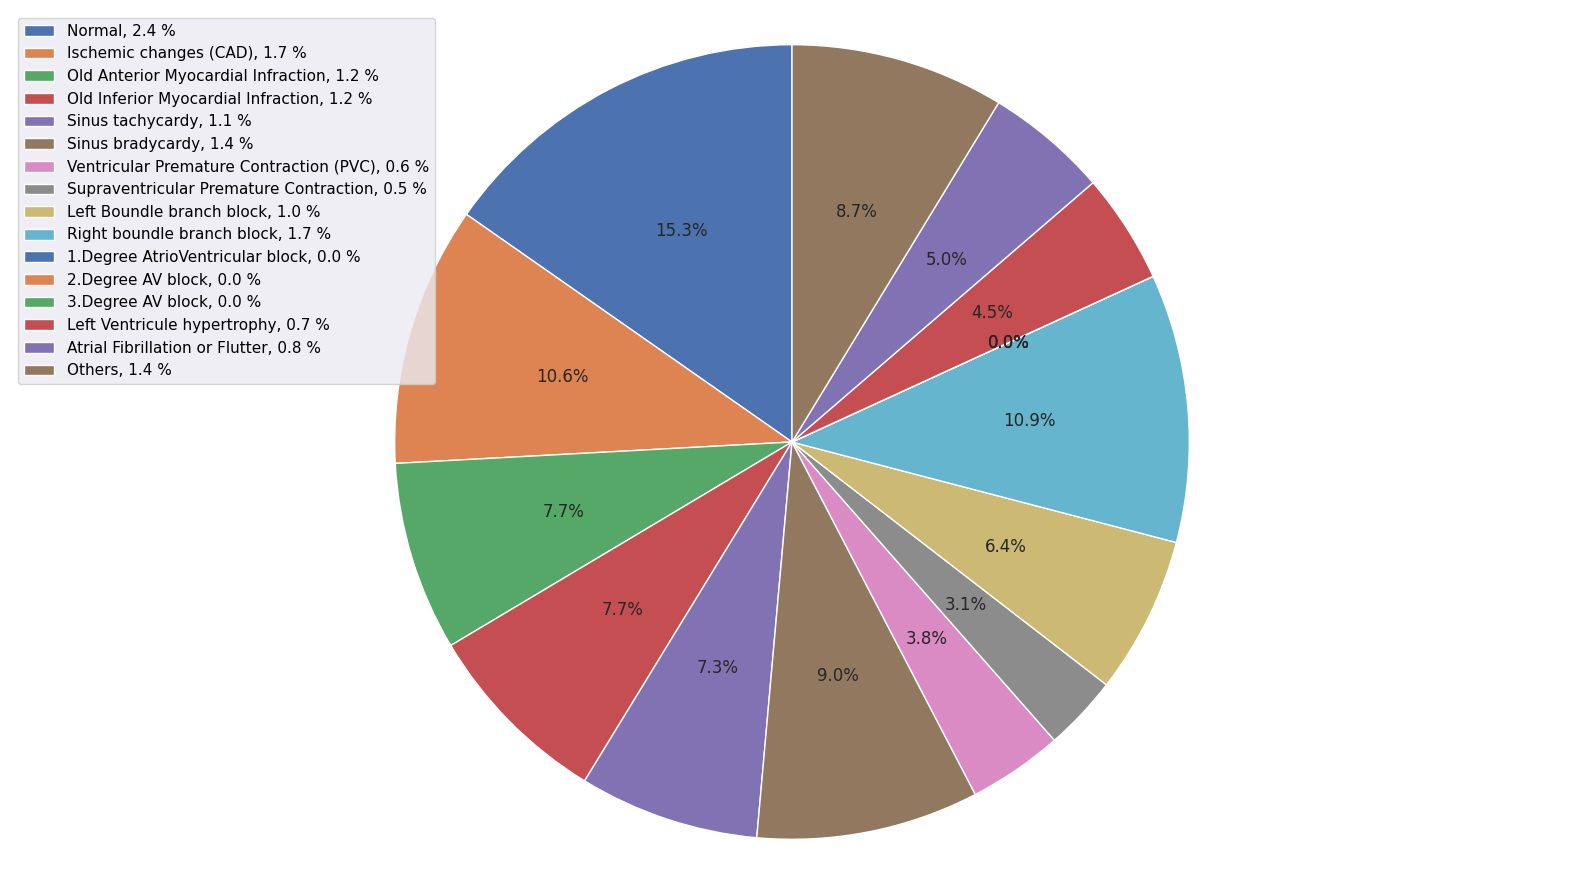

In [258]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()


We found that Of the 452 examples, 245 are of class A which refers to "normal" people. We also have 12 different types of arrhythmias and 3 other type of arrthmias are not present in our dataset.


### Handling Outliers & Data Visualization

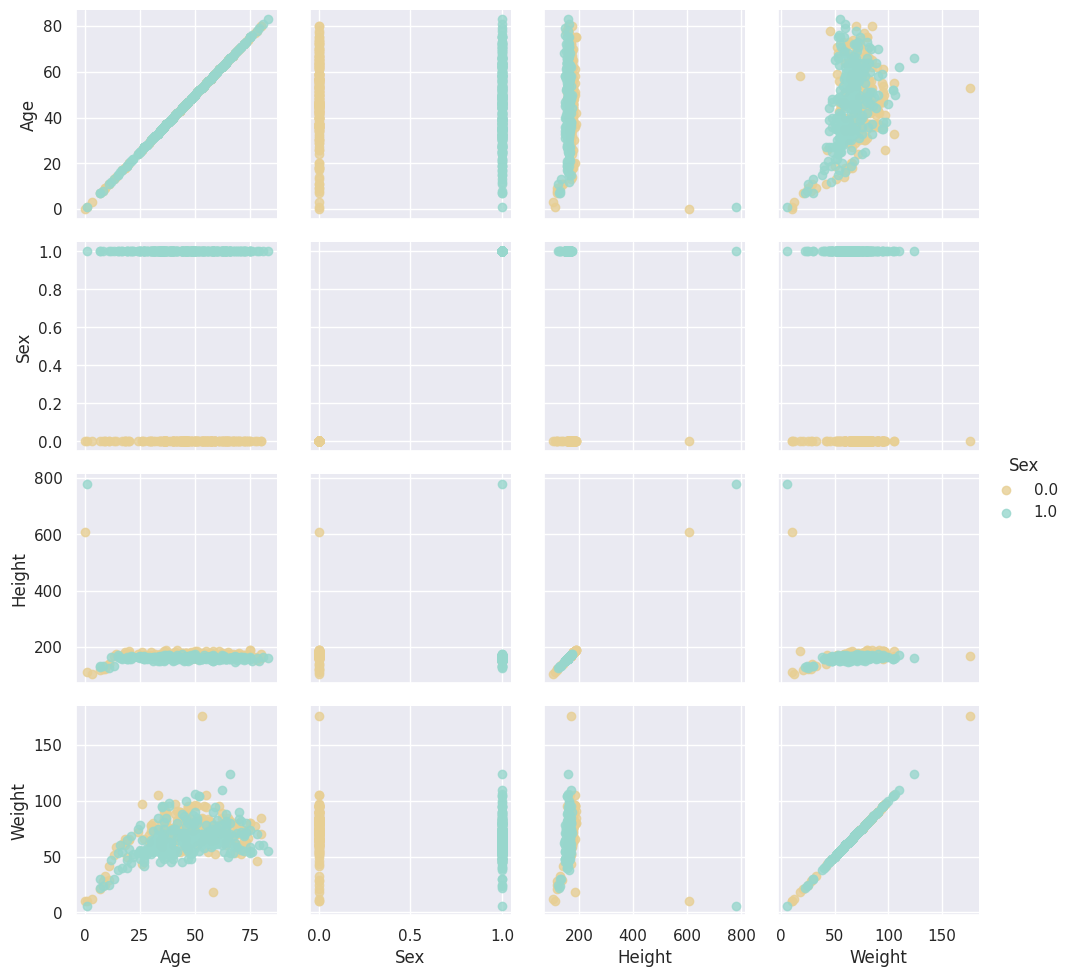

In [259]:
#looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

According to scatter plots, there are few outliers in 'height' and 'weight' attributes.check the maximums of heights and weights

In [260]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was **272** cm (1940). His followers were **267** cm(1905) and **263.5** cm(1969). Replacing **780** and **608** with **180** and **108** cm respectively

In [261]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [262]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

**176 kgs** is a possible weight. so we'll keep them in the dataframe.

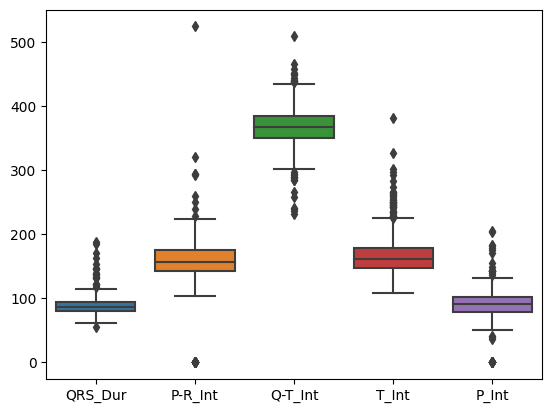

In [157]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration.

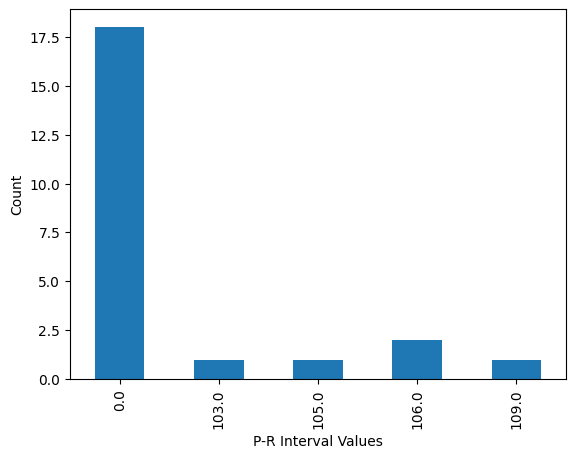

In [158]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

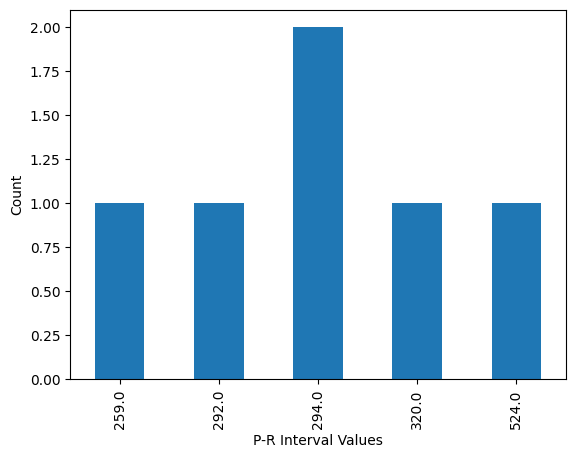

In [159]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

PR Interval data is including outliers 0(x18). we'll keep them

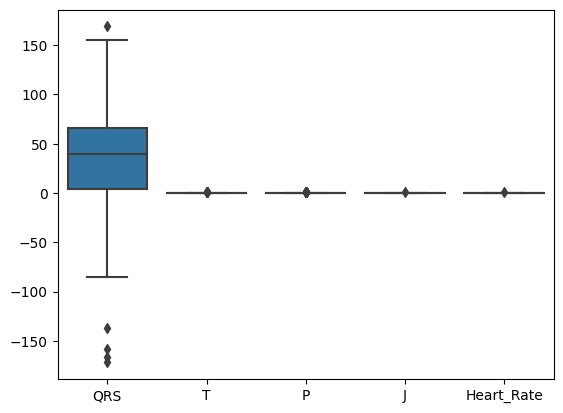

In [160]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

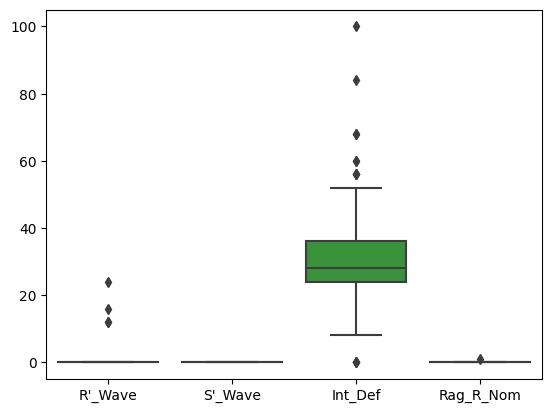

In [161]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

*S*'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [162]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

0.0    452
Name: S'_Wave, dtype: int64

In [163]:
final_df["V101"].value_counts().sort_index(ascending=False)

216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64

**V101** has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped.

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) **has only 2 instances**. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

In [164]:
final_df["V201"].value_counts().sort_index(ascending=False)

216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: V201, dtype: int64

In [165]:
final_df["V301"].value_counts().sort_index(ascending=False)

132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: V301, dtype: int64

In [166]:
final_df["V501"].value_counts().sort_index(ascending=False)

136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: V501, dtype: int64

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

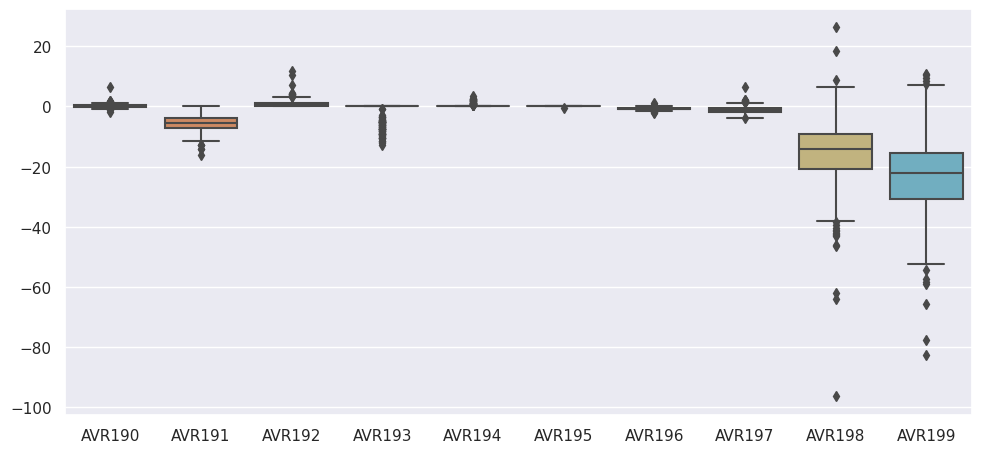

In [167]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

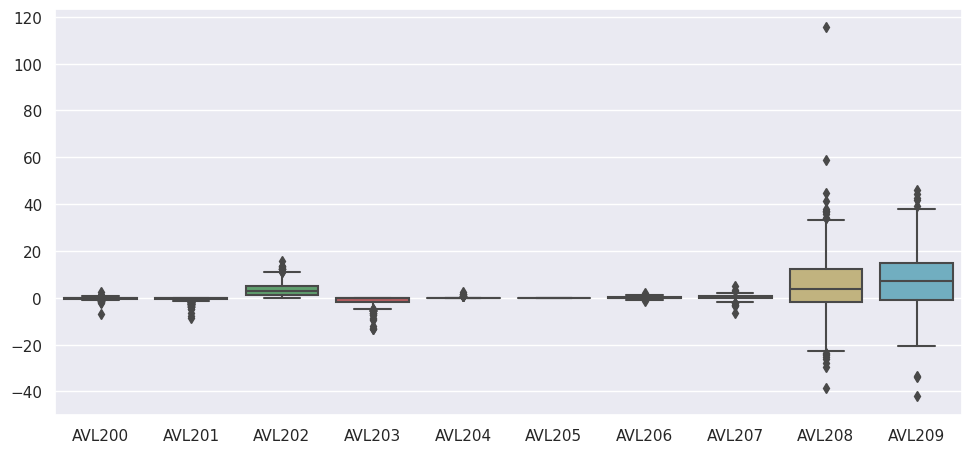

In [168]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

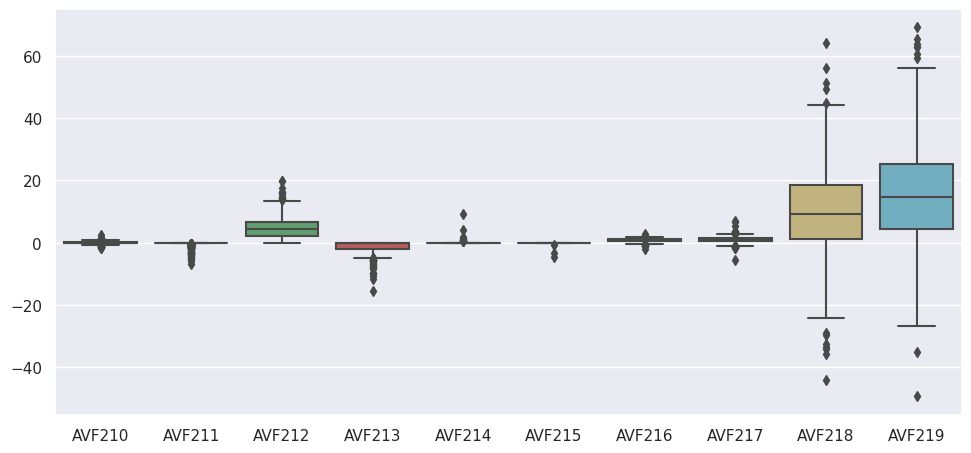

In [169]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

In [170]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

## Feature Scaling and Splitting dataset
<br />
We will be using 80% of our dataset for training purpose and 20% for testing purpose.

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=1)

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
import warnings
warnings.filterwarnings('ignore')

## Evaluation strategy


As the dependent variable is a categorical variable we will be using classification models. The best evaluation strategy for classification models is comparing the precision and recall. Thinking about the classification evaluation metrics, the importance of our models' precitions (we can't accept a result having the probability of saying to a healthy person that you have Cardiac Arrhythmia (FN)).

We definitely will focus on Sensitivity (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition).

###Install scikit-plot package

In [174]:
pip install scikit-plot

In [175]:
# importing evaluation metrices.
import random
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc

# **3. Modeling**

In [176]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])
random.seed(0)

## KNN Classifier

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [178]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))
knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train),average="weighted")
knn_test_recall = recall_score(y_test, knnclassifier.predict(X_test),average="weighted")

In [179]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6481994459833795
Test Recall score: 0.6483516483516484


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [180]:
result = result.append(pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}),ignore_index=True)


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352


## Logistic regression

In [181]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga',random_state = 0)
lgclassifier.fit(X_train, y_train)
y_pred = lgclassifier.predict(X_test)

In [182]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))


In [183]:
print('Train Recall score: {}'
      .format(lg_train_recall))
print('Test Recall score: {}'
      .format(lg_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.9390581717451524
Test Recall score: 0.7802197802197802


array([[46,  2,  0,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]])

In [184]:
result = result.append(pd.Series({'Model':'Logestic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}),ignore_index=True )

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220


## Decision Tree Classifier

In [185]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train)
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [186]:
dt_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)


In [187]:
print('Train Recall score: {}'
      .format(dt_train_recall))
print('Test Recall score: {}'
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7894736842105263
Test Recall score: 0.6813186813186813


array([[50,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0]])

In [188]:
result = result.append(pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319


## Linear SVM

In [189]:
from sklearn.svm import LinearSVC
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train)
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

In [190]:
lsvc_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy = accuracy_score(y_test, y_pred_test)
lsvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
lsvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [191]:
print('Train Recall score: {}'
      .format(lsvc_train_recall))
print('Test Recall score: {}'
      .format(lsvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8808864265927978
Test Recall score: 0.7802197802197802


array([[50,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [192]:
result = result.append(pd.Series({'Model':'Linear SVC','Train Accuracy':lsvc_train_accuracy,'Test Accuracy':lsvc_test_accuracy}),ignore_index=True )
#result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220


## Kernelized SVM

In [193]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [194]:
ksvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
ksvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

In [195]:
print('Train Recall score: {}'
      .format(ksvc_train_recall))
print('Test Recall score: {}'
      .format(ksvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.850415512465374
Test Recall score: 0.7912087912087912


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [196]:
result = result.append(pd.Series({'Model':'Kernelized SVC','Train Accuracy':ksvc_train_accuracy,'Test Accuracy':ksvc_test_accuracy}),ignore_index=True )
#result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209


## Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [198]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [199]:
print('Train Recall score: {}'
      .format(rf_train_recall))
print('Test Recall score: {}'
      .format(rf_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8975069252077562
Test Recall score: 0.7582417582417582


array([[51,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [200]:
result = result.append(pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy,'Test Accuracy':rf_test_accuracy}),ignore_index=True )
#result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.897507,0.758242


We found that the best model in term of recall Score is kernelized SVM with accuracy percentage of **79.12** over other models. We also found that Logestic Regression has better accuracy score.

---
---


#Sampling and PCA

Since our dataset is imbalance with number of instances of class 7 and class 8 are 2,3 respectively, whereas for class 1, having examples 245. So we will try to solve class imbalancy by randomly resample the training dataset using Oversampling.

We will be using PCA(Principal Component Analysis) to reduce the dimension of our sampled dataset to get best feature to find better accuracy.


##Random Over Sampling

In [201]:
#performing over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(final_df, target)

X_resampled.shape

(3185, 278)

In [202]:
#finding frequency of each class

import collections
counter = collections.Counter(y_resampled)
counter


Counter({8.0: 245,
         6.0: 245,
         10.0: 245,
         1.0: 245,
         7.0: 245,
         14.0: 245,
         3.0: 245,
         16.0: 245,
         2.0: 245,
         4.0: 245,
         5.0: 245,
         9.0: 245,
         15.0: 245})

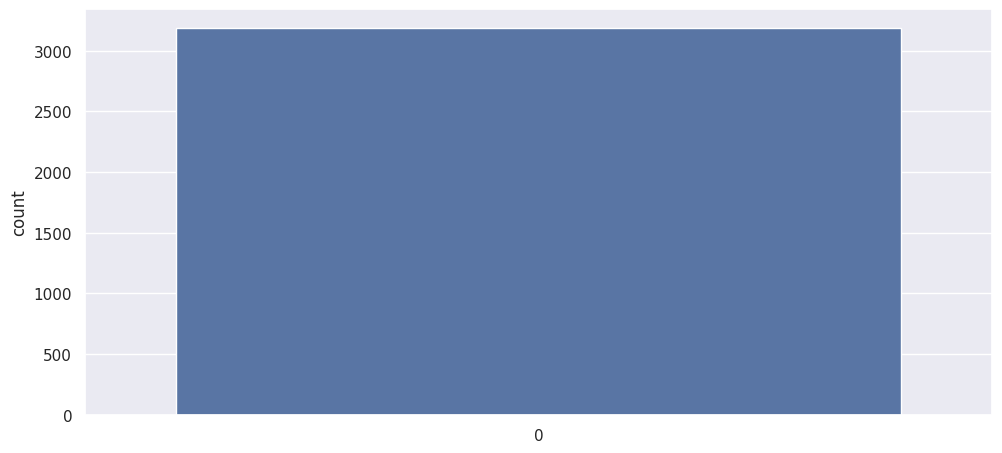

In [203]:
sns.countplot(y_resampled)
plt.show()

In [204]:
X_train1, X_test1, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

# PCA

We will be using PCA(Principal Component Analysis) to reduce the dimension of our sampled dataset to get best feature to find better accuracy.

In [205]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train1)
pca.n_components_

99

In [206]:
X_train_pca = pca.transform(X_train1)
X_test_pca = pca.transform(X_test1)

In [207]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

# KNN with PCA

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knnp_clf = KNeighborsClassifier(n_neighbors=5)
knnp_clf.fit(X_train_pca, y_train)
y_pred_train = knnp_clf.predict(X_train_pca)
y_pred_test = knnp_clf.predict(X_test_pca)

In [209]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [210]:

print('Train Recall score: {}'
      .format(knnp_train_recall))
print('Test Recall score: {}'
      .format(knnp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9686028257456829
Test Recall score: 0.9434850863422292


array([[34,  1,  0,  2,  2, 10,  0,  0,  0,  3,  0,  1,  4],
       [ 6, 48,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  2,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43]])

In [211]:
result = result.append(pd.Series({'Model':'KNN Classifier with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.897507,0.758242
6,KNN Classifier with PCA,0.968603,0.943485


we didn't find any improvement on PCA data with knn classifier model.

# Logestic with PCA

In [212]:
from sklearn.linear_model import LogisticRegression
lgp_clf = LogisticRegression(solver='saga',C=0.01)
lgp_clf.fit(X_train_pca, y_train)
y_pred_train = lgp_clf.predict(X_train_pca)
y_pred_test = lgp_clf.predict(X_test_pca)


In [213]:
lgp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lgp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lgp_train_accuracy = accuracy_score(y_train, y_pred_train)
lgp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [214]:
print('Train Recall score: {}'
      .format(lgp_train_recall))
print('Test Recall score: {}'
      .format(lgp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9273940345368917
Test Recall score: 0.9073783359497645


array([[28,  2,  1,  2,  4,  7,  0,  1,  0,  2,  0,  0, 10],
       [ 2, 48,  0,  1,  0,  3,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0, 41,  0,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0, 42,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 2,  2,  0,  0,  2,  5,  0,  0,  0,  0,  0,  1, 31]])

In [215]:
result = result.append(pd.Series({'Model':'Logestic Regression with PCA','Train Accuracy':lgp_train_accuracy,'Test Accuracy':lgp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.897507,0.758242
6,KNN Classifier with PCA,0.968603,0.943485
7,Logestic Regression with PCA,0.927394,0.907378


# Linear svm with PCA

In [216]:
from sklearn.svm import LinearSVC
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(X_train_pca, y_train)
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)

In [217]:
lsvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lsvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lsvcp_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [218]:
print('Train Recall score: {}'
      .format(lsvcp_train_recall))
print('Test Recall score: {}'
      .format(lsvcp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8846153846153846
Test Recall score: 0.8649921507064364


array([[12,  3,  1,  4,  5, 14,  3,  2,  0,  2,  1,  0, 10],
       [ 0, 46,  0,  1,  0,  4,  0,  0,  0,  0,  0,  1,  4],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 41,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  1,  0,  0, 40,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 4,  2,  0,  0,  3,  7,  0,  0,  0,  2,  0,  1, 24]])

In [219]:
result = result.append(pd.Series({'Model':'Linear SVC with PCA','Train Accuracy':lsvcp_train_accuracy,'Test Accuracy':lsvcp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.897507,0.758242
6,KNN Classifier with PCA,0.968603,0.943485
7,Logestic Regression with PCA,0.927394,0.907378
8,Linear SVC with PCA,0.884615,0.864992


# Kernal svm with PCA

In [220]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

KSVC_clf.fit(X_train_pca, y_train)
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

In [221]:
ksvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
ksvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ksvcp_train_accuracy = accuracy_score(y_train, y_pred_train,)
ksvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [222]:
print('Train Recall score: {}'
      .format(ksvcp_train_recall))
print('Test Recall score: {}'
      .format(ksvcp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.957221350078493
Test Recall score: 0.9403453689167975


array([[40,  2,  0,  0,  1,  9,  0,  0,  0,  1,  0,  0,  4],
       [ 2, 50,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0, 43,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 2,  3,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0, 33]])

In [223]:
result = result.append(pd.Series({'Model':'kernelized SVC with PCA','Train Accuracy':ksvcp_train_accuracy,'Test Accuracy':ksvcp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.897507,0.758242
6,KNN Classifier with PCA,0.968603,0.943485
7,Logestic Regression with PCA,0.927394,0.907378
8,Linear SVC with PCA,0.884615,0.864992
9,kernelized SVC with PCA,0.957221,0.940345


# DecisionTree Classifier with PCA

In [224]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(X_train_pca, y_train)
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

In [225]:
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [226]:
print('Train Recall score: {}'
      .format(dtp_train_recall))
print('Test Recall score: {}'
      .format(dtp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.5871271585557299
Test Recall score: 0.5510204081632653


array([[ 1,  0,  1,  4,  1, 43,  0,  0,  0,  4,  3,  0,  0],
       [ 0, 10,  0,  0, 13, 31,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  5,  4,  0,  3,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0, 37,  0, 22,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  3, 25, 16,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0, 39,  0,  0,  0,  3,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  2,  0, 17, 17,  0,  0,  0,  8,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  7,  0,  4, 28,  3,  0,  0,  0,  0,  0,  1]])

In [227]:
result = result.append(pd.Series({'Model':'DecisionTree Classifier with PCA','Train Accuracy':dtp_train_accuracy,'Test Accuracy':dtp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.897507,0.758242
6,KNN Classifier with PCA,0.968603,0.943485
7,Logestic Regression with PCA,0.927394,0.907378
8,Linear SVC with PCA,0.884615,0.864992
9,kernelized SVC with PCA,0.957221,0.940345


# Random Forest Classifier With PCA

In [228]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train_pca, y_train)
y_pred_train = rfp_clf.predict(X_train_pca)
y_pred_test = rfp_clf.predict(X_test_pca)

In [229]:
rfp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
rfp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
rfp_train_accuracy = accuracy_score(y_train, y_pred_train)
rfp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [230]:
print('Train Recall score: {}'
      .format(rfp_train_recall))
print('Test Recall score: {}'
      .format(rfp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 1.0
Test Recall score: 0.9952904238618524


array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43]])

In [231]:
result = result.append(pd.Series({'Model':'Random Forest Classifier with PCA','Train Accuracy':rfp_train_accuracy,'Test Accuracy':rfp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.897507,0.758242
6,KNN Classifier with PCA,0.968603,0.943485
7,Logestic Regression with PCA,0.927394,0.907378
8,Linear SVC with PCA,0.884615,0.864992
9,kernelized SVC with PCA,0.957221,0.940345


---
---

# Result

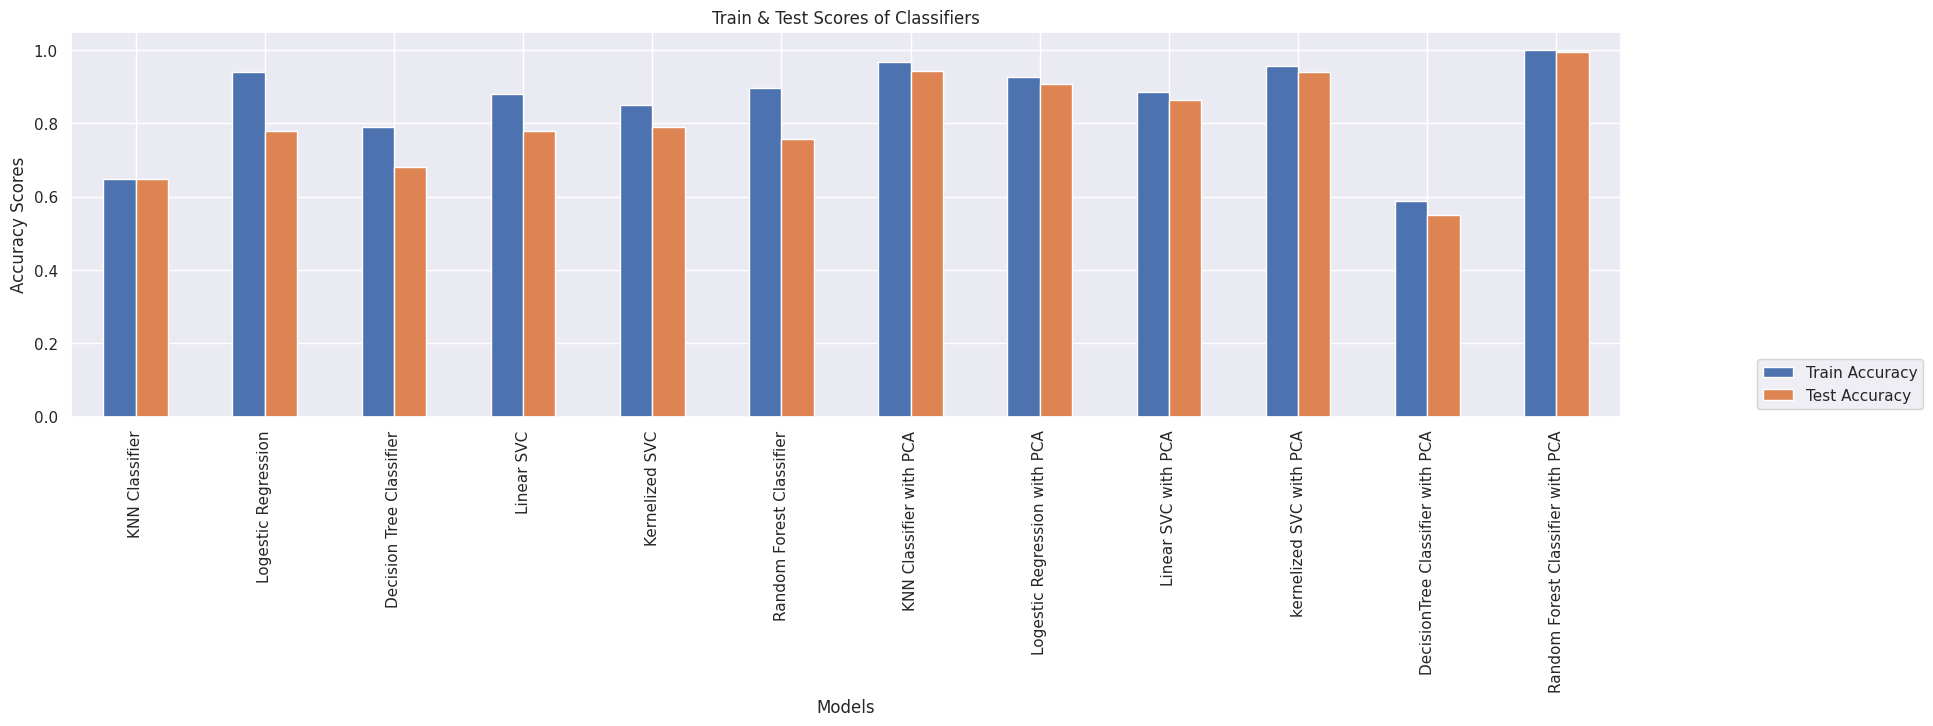

In [232]:
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

## Conclusion

The models started performing better after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data. It creates components based on giving importance to variables with large variance and also the components which it creates are non collinear in nature which means it takes care of collinearity in large data set. PCA also improves the overall execution time and quality of the models and it is very beneficial when we are working with huge amount of variables.

The Best model in term of recall score is **Random Forest Classifier with PCA** having accuracy of **99.5%.**